This notebook serves as an example of how to load and manipulate the [Si GAP dataset](https://www.repository.cam.ac.uk/handle/1810/317974) using a `Dataset` object.

# Uncomment for Google Colab

# Imports

In [1]:
import os
import numpy as np

# Initialize the database

In [2]:
from colabfit.tools.database import MongoDatabase, load_data

client = MongoDatabase('example', drop_database=True)

# Property definitions

In [3]:
client.insert_property_definition({
    'property-id': 'energy-forces-stress',
    'property-title': 'Basic outputs from a static calculation',
    'property-description':
        'Energy, forces, and stresses from a calculation of a '\
        'static configuration. Energies must be specified to be '\
        'per-atom or supercell. If a reference energy has been '\
        'used, this must be specified as well.',

    'energy': {
        'type': 'float',
        'has-unit': True,
        'extent': [],
        'required': False,
        'description':
            'The potential energy of the system.'
    },
    'forces': {
        'type': 'float',
        'has-unit': True,
        'extent': [":", 3],
        'required': False,
        'description':
            'The [x,y,z] components of the force on each particle.'
    },
    'stress': {
        'type': 'float',
        'has-unit': True,
        'extent': [3, 3],
        'required': False,
        'description':
            'The full Cauchy stress tensor of the simulation cell'
    },

    'per-atom': {
        'type': 'bool',
        'has-unit': False,
        'extent': [],
        'required': True,
        'description':
            'If True, "energy" is the total energy of the system, '\
            'and has NOT been divided by the number of atoms in the '\
            'configuration.'
    },
    'reference-energy': {
        'type': 'float',
        'has-unit': True,
        'extent': [],
        'required': False,
        'description':
            'If provided, then "energy" is the energy (either of '\
            'the whole system, or per-atom) LESS the energy of '\
            'a reference configuration (E = E_0 - E_reference). '\
            'Note that "reference-energy" is just provided for '\
            'documentation, and that "energy" should already have '\
            'this value subtracted off. The reference energy must '\
            'have the same units as "energy".'
    },
})

/home/jvita/scripts/colabfit/colabfit/tools/database.py:922: UserWarning: Invalid KIM property-id; Temporarily renaming to tag:@,0000-00-00:property/energy-forces-stress. See https://openkim.org/doc/schema/properties-framework/ for more details.
  warnings.warn(


In [4]:
extra_stuff_definition = {
    'property-id': 'si-prx-gap-data',
    'property-title': 'Si PRX GAP data',
    'property-description': 'A property for storing all of the additional information provided for the Si PRX GAP dataset',

    'mix_history_length':         {'type': 'float',  'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'castep_file_name':           {'type': 'string', 'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'grid_scale':                 {'type': 'float',  'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'popn_calculate':             {'type': 'bool',   'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'n_neighb':                   {'type': 'int',    'has-unit': False, 'extent': [":"],   'required': False, 'description': ''},
    'oldpos':                     {'type': 'float',  'has-unit': True,  'extent': [":",3], 'required': False, 'description': ''},
    'i_step':                     {'type': 'int',    'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'md_temperature':             {'type': 'float',  'has-unit': True,  'extent': [],      'required': False, 'description': ''},
    'positions':                  {'type': 'float',  'has-unit': True,  'extent': [":",3], 'required': False, 'description': ''},
    'task':                       {'type': 'string', 'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'data_distribution':          {'type': 'string', 'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'avg_ke':                     {'type': 'float',  'has-unit': True,  'extent': [":"],   'required': False, 'description': ''},
    'force_nlpot':                {'type': 'float',  'has-unit': True,  'extent': [":",3], 'required': False, 'description': ''},
    'continuation':               {'type': 'string', 'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'castep_run_time':            {'type': 'float',  'has-unit': True,  'extent': [],      'required': False, 'description': ''},
    'calculate_stress':           {'type': 'bool',   'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'Minim_Hydrostatic_Strain':   {'type': 'bool',   'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'avgpos':                     {'type': 'float',  'has-unit': True,  'extent': [":",3], 'required': False, 'description': ''},
    'frac_pos':                   {'type': 'float',  'has-unit': False, 'extent': [":",3], 'required': False, 'description': ''},
    'hamiltonian':                {'type': 'float',  'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'md_cell_t':                  {'type': 'float',  'has-unit': True,  'extent': [],      'required': False, 'description': ''},
    'cutoff_factor':              {'type': 'float',  'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'momenta':                    {'type': 'float',  'has-unit': False, 'extent': [":",3], 'required': False, 'description': ''},
    'elec_energy_tol':            {'type': 'float',  'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'mixing_scheme':              {'type': 'string', 'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'Minim_Lattice_Fix':          {'type': 'float',  'has-unit': False, 'extent': [9],     'required': False, 'description': ''},
    'in_file':                    {'type': 'string', 'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'travel':                     {'type': 'float',  'has-unit': False, 'extent': [":",3], 'required': False, 'description': ''},
    'thermostat_region':          {'type': 'float',  'has-unit': False, 'extent': [":"],   'required': False, 'description': ''},
    'time':                       {'type': 'float',  'has-unit': True,  'extent': [],      'required': False, 'description': ''},
    'temperature':                {'type': 'float',  'has-unit': True,  'extent': [],      'required': False, 'description': ''},
    'kpoints_mp_grid':            {'type': 'float',  'has-unit': False, 'extent': [3],     'required': False, 'description': ''},
    'gap_force':                  {'type': 'float',  'has-unit': True,  'extent': [":",3], 'required': False, 'description': ''},
    'gap_energy':                 {'type': 'float',  'has-unit': True,  'extent': [],      'required': False, 'description': ''},
    'cutoff':                     {'type': 'float',  'has-unit': True,  'extent': [],      'required': False, 'description': ''},
    'xc_functional':              {'type': 'string', 'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'smearing_width':             {'type': 'float',  'has-unit': True,  'extent': [],      'required': False, 'description': ''},
    'pressure':                   {'type': 'float',  'has-unit': True,  'extent': [],      'required': False, 'description': ''},
    'gap_virial':                 {'type': 'float',  'has-unit': True,  'extent': [9],     'required': False, 'description': ''},
    'reuse':                      {'type': 'string', 'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'fix_occupancy':              {'type': 'bool',   'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'map_shift':                  {'type': 'float',  'has-unit': False, 'extent': [":",3], 'required': False, 'description': ''},
    'md_num_iter':                {'type': 'int',    'has-unit': False, 'extent': [], 'required': False, 'description': ''},
    'damp_mask':                  {'type': 'float',  'has-unit': False, 'extent': [":"],   'required': False, 'description': ''},
    'opt_strategy':               {'type': 'string', 'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'spin_polarized':             {'type': 'bool',   'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'nextra_bands':               {'type': 'int',    'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'fine_grid_scale':            {'type': 'float',  'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'masses':                     {'type': 'float',  'has-unit': True,  'extent': [":"],   'required': False, 'description': ''},
    'iprint':                     {'type': 'int',    'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'finite_basis_corr':          {'type': 'string', 'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'enthalpy':                   {'type': 'float',  'has-unit': True,  'extent': [],      'required': False, 'description': ''},
    'opt_strategy_bias':          {'type': 'int',    'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'force_ewald':                {'type': 'float',  'has-unit': True,  'extent': [":",3], 'required': False, 'description': ''},
    'num_dump_cycles':            {'type': 'int',    'has-unit': False,  'extent': [],     'required': False, 'description': ''},
    'velo':                       {'type': 'float',  'has-unit': True,  'extent': [":",3], 'required': False, 'description': ''},
    'md_delta_t':                 {'type': 'float',  'has-unit': True,  'extent': [],      'required': False, 'description': ''},
    'md_ion_t':                   {'type': 'float',  'has-unit': True,  'extent': [],      'required': False, 'description': ''},
    'force_locpot':               {'type': 'float',  'has-unit': True,  'extent': [":",3], 'required': False, 'description': ''},
    'numbers':                    {'type': 'int',    'has-unit': False, 'extent': [":"],   'required': False, 'description': ''},
    'max_scf_cycles':             {'type': 'int',    'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'mass':                       {'type': 'float',  'has-unit': True,  'extent': [":"],      'required': False, 'description': ''},
    'Minim_Constant_Volume':      {'type': 'bool',   'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'cut_off_energy':             {'type': 'float',  'has-unit': True,  'extent': [],      'required': False, 'description': ''},
    'virial':                     {'type': 'float',  'has-unit': True,  'extent': [3,3],   'required': False, 'description': ''},
    'nneightol':                  {'type': 'float',  'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'max_charge_amp':             {'type': 'float',  'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'md_thermostat':              {'type': 'string', 'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'md_ensemble':                {'type': 'string', 'has-unit': False, 'extent': [],      'required': False, 'description': ''},
    'acc':                        {'type': 'float',  'has-unit': False, 'extent': [":",3], 'required': False, 'description': ''},
}

units = {
    'energy': 'eV',
    'forces': 'eV/Ang',
    'virial': 'GPa',
    'oldpos': 'Ang',
    'md_temperature': 'K',
    'positions': 'Ang',
    'avg_ke': 'eV',
    'force_nlpot': 'eV/Ang',
    'castep_run_time': 's',
    'avgpos': 'Ang',
    'md_cell_t': 'ps',
    'time': 's',
    'temperature': 'K',
    'gap_force': 'eV/Ang',
    'gap_energy': 'eV',
    'cutoff': 'Ang',
    'smearing_width': 'eV',
    'pressure': 'GPa',
    'gap_virial': 'GPa',
    'masses': '_amu',
    'enthalpy': 'eV',
    'force_ewald': 'eV/Ang',
    'velo': 'Ang/s',
    'md_delta_t': 'fs',
    'md_ion_t': 'ps',
    'force_locpot': 'eV/Ang',
    'mass': 'g',
    'cut_off_energy': 'eV',
    'virial': 'GPa',
}

property_map = {
    'energy-forces-stress': {
        # Property Definition field: {'field': ASE field, 'units': ASE-readable units}
        'energy': {'field': 'dft_energy', 'units': 'eV'},
        'forces': {'field': 'dft_force', 'units': 'eV/Ang'},
        'stress': {'field': 'dft_virial', 'units': 'GPa'},
        'per-atom': {'field': 'per-atom', 'units': None},
    },
    'si-prx-gap-data': {
        k.replace('_', '-').lower(): {'field': k , 'units': units[k] if k in units else None}
        for k in extra_stuff_definition if k not in {'property-id', 'property-title', 'property-description'}
    }
}

# Can't use underscores in field names
extra_stuff_definition = {
    k.replace('_', '-').lower(): v for k,v in extra_stuff_definition.items()
}

In [5]:
client.insert_property_definition(extra_stuff_definition)

/home/jvita/scripts/colabfit/colabfit/tools/database.py:922: UserWarning: Invalid KIM property-id; Temporarily renaming to tag:@,0000-00-00:property/si-prx-gap-data. See https://openkim.org/doc/schema/properties-framework/ for more details.
  warnings.warn(


# Data loading

In [6]:
images = list(load_data(
    file_path='/home/jvita/scripts/colabfit/data/gap_si/gp_iter6_sparse9k.xml.xyz',
    file_format='xyz',
    name_field='config_type',  # key in Configuration.info to use as the Configuration name
    elements=['Si'],    # order matters for CFG files, but not others
    default_name='Si_PRX_GAP',  # default name with `name_field` not found
    verbose=True
))

Loading data: 100%|██████████████████████████████████████████████████████| 2475/2475 [00:00<00:00, 9836.21it/s]


In [7]:
images[0]

Configuration(symbols='Si', pbc=True, cell=[20.0, 20.0, 20.0], dft_force=..., gap_force=..., map_shift=..., n_neighb=...)

In [8]:
images[0].info.keys()

dict_keys(['config_type', 'gap_energy', 'gap_virial', 'dft_energy', 'cutoff', 'nneightol', '_name', '_labels', '_constraints'])

In [9]:
images[0].arrays.keys()

dict_keys(['numbers', 'positions', 'map_shift', 'n_neighb', 'gap_force', 'dft_force'])

In [10]:
images[0].info['_name']

{'isolated_atom'}

In [11]:
# Data stored on atoms needs to be cleaned
def tform(img):
    img.info['per-atom'] = False
    
    # Renaming some fields to be consistent
    if 'DFT_energy' in img.info:
        img.info['dft_energy'] = img.info['DFT_energy']
        del img.info['DFT_energy']
        
    if 'DFT_force' in img.arrays:
        img.arrays['dft_force'] = img.arrays['DFT_force']
        del img.arrays['DFT_force']
        
    if 'DFT_virial' in img.info:
        img.info['dft_virial'] = img.info['DFT_virial']
        del img.info['DFT_virial']
        
    # Converting some string values to floats
    for k in [
        'md_temperature', 'md_cell_t', 'smearing_width', 'md_delta_t',
        'md_ion_t', 'cut_off_energy', 'elec_energy_tol',
        ]:
        if k in img.info:
            try:
                img.info[k] = float(img.info[k].split(' ')[0])
            except:
                pass
    
    # Reshaping shape (9,) stress vector to (3, 3) to match definition
    if 'dft_virial' in img.info:
        img.info['dft_virial'] = img.info['dft_virial'].reshape((3,3))

In [12]:
from colabfit.tools.property_settings import PropertySettings

pso = PropertySettings(
    method='CASTEP',
    description='DFT calculations using the CASTEP software',
    files=None,
    labels=['Monkhorst-Pack'],
)

ids = client.insert_data(
    images,
    property_map=property_map,
    property_settings={'energy-forces-stress': pso, 'si-prx-gap-data': pso},
    transform=tform,
    verbose=True
)

Preparing to add configurations to Database: 100%|████████████████████████| 2475/2475 [00:13<00:00, 187.17it/s]
/home/jvita/scripts/colabfit/colabfit/tools/database.py:840: UserWarning: 4 duplicate configurations detected
  warnings.warn(


Note: this dataset has four pairs of duplicate configurations. This can be seen by counting the number of configurations that have twice as many linked properties as expected (expected is 2).

In [13]:
client.configurations.count_documents(
    {'relationships.properties.2': {'$exists': True}}
)

4

# Building Configuration Sets

In [14]:
# Used for building groups of configurations for easier analysis/exploration
configuration_set_regexes = {
    'isolated_atom': 'Reference atom',
    'bt': 'Beta-tin',
    'dia': 'Diamond',
    'sh': 'Simple hexagonal',
    'hex_diamond': 'Hexagonal diamond',
    'bcc': 'Body-centered-cubic',
    'bc8': 'BC8',
    'fcc': 'Face-centered-cubic',
    'hcp': 'Hexagonal-close-packed',
    'st12': 'ST12',
    'liq': 'Liquid',
    'amorph': 'Amorphous',
    'surface_001': 'Diamond surface (001)',
    'surface_110': 'Diamond surface (110)',
    'surface_111': 'Diamond surface (111)',
    'surface_111_pandey': 'Pandey reconstruction of diamond (111) surface',
    'surface_111_3x3_das': 'Dimer-adatom-stacking-fault (DAS) reconstruction',
    '111adatom': 'Configurations with adatom on (111) surface',
    'crack_110_1-10': 'Small (110) crack tip',
    'crack_111_1-10': 'Small (111) crack tip',
    'decohesion': 'Decohesion of diamond-structure Si along various directions',
    'divacancy': 'Diamond divacancy configurations',
    'interstitial': 'Diamond interstitial configurations',
    'screw_disloc': 'Si screw dislocation core',
    'sp': 'sp bonded configurations',
    'sp2': 'sp2 bonded configurations',
    'vacancy': 'Diamond vacancy configurations'
}

In [15]:
cs_ids = []

for i, (regex, desc) in enumerate(configuration_set_regexes.items()):
    co_ids = client.get_data(
        'configurations',
        fields='_id',
        query={'names': {'$regex': regex}},
        ravel=True
    ).tolist()
    
    print(f'Configuration set {i}', f'({regex}):'.rjust(22), f'{len(co_ids)}'.rjust(7))

    cs_id = client.insert_configuration_set(co_ids, description=desc)
    
    cs_ids.append(cs_id)

Configuration set 0       (isolated_atom):       1
Configuration set 1                  (bt):     445
Configuration set 2                 (dia):     538
Configuration set 3                  (sh):     223
Configuration set 4         (hex_diamond):      49
Configuration set 5                 (bcc):      49
Configuration set 6                 (bc8):      49
Configuration set 7                 (fcc):      49
Configuration set 8                 (hcp):      49
Configuration set 9                (st12):      49
Configuration set 10                 (liq):      76
Configuration set 11              (amorph):     159
Configuration set 12         (surface_001):      29
Configuration set 13         (surface_110):      26
Configuration set 14         (surface_111):      98
Configuration set 15  (surface_111_pandey):      50
Configuration set 16 (surface_111_3x3_das):       1
Configuration set 17           (111adatom):      10
Configuration set 18      (crack_110_1-10):       7
Configuration set 19  

# Building the Dataset

In [16]:
all_co_ids, all_pr_ids = list(zip(*ids))
len(all_pr_ids)

4950

In [17]:
ds_id = client.insert_dataset(
    cs_ids=cs_ids,
    pr_ids=all_pr_ids,
    name='Si_PRX_GAP',
    authors=[
        'Albert P. Bartók', 'James Kermode', 'Noam Bernstein', 'Gábor Csányi'
    ],
    links=[
        'https://journals.aps.org/prx/abstract/10.1103/PhysRevX.8.041048',
        'https://www.repository.cam.ac.uk/handle/1810/317974'
    ],
    description=\
        "The original DFT training data for the general-purpose silicon "\
        "interatomic potential described in the associated publication."\
        " The kinds of configuration that we include are chosen using "\
        "intuition and past experience to guide what needs to be included "\
        "to obtain good coverage pertaining to a range of properties.",
    resync=True,
    verbose=True,
)
ds_id

Updating PR->DS relationships: 100%|███████████████████████████████████| 4950/4950 [00:00<00:00, 216356.69it/s]


'5479095385593854142'

# Adding labels

In [18]:
all_co_ids, all_pr_ids = list(zip(*ids))
len(all_pr_ids)

4950

In [19]:
client.apply_labels(dataset_id=ds_id, collection_name='properties', query={'si-prx-gap-data.xc-functional.source-value': 'PW91'}, labels='PW91', verbose=True)
client.apply_labels(dataset_id=ds_id, collection_name='properties', query={'si-prx-gap-data.xc-functional.source-value': 'PBE'}, labels='PBE', verbose=True)

Applying configuration labels: 1183it [00:00, 1321.34it/s]
Applying configuration labels: 50it [00:00, 732.15it/s]


In [20]:
# Used to apply metadata labels to configurations for future queries
configuration_label_regexes = {
    'isolated_atom': 'isolated_atom',
    'bt': 'a5',
    'dia': 'diamond',
    'sh': 'sh',
    'hex_diamond': 'sonsdaleite',
    'bcc': 'bcc',
    'bc8': 'bc8',
    'fcc': 'fcc',
    'hcp': 'hcp',
    'st12': 'st12',
    'liq': 'liquid',
    'amorph': 'amorphous',
    'surface_001': ['surface', '001'],
    'surface_110': ['surface', '110'],
    'surface_111': ['surface', '111'],
    'surface_111_pandey': ['surface', '111'],
    'surface_111_3x3_das': ['surface', '111', 'das'],
    '111adatom': ['surface', '111', 'adatom'],
    'crack_110_1-10': ['crack', '110'],
    'crack_111_1-10': ['crac', '111'],
    'decohesion': ['diamond', 'decohesion'],
    'divacancy': ['diamond', 'vacancy', 'divacancy'],
    'interstitial': ['diamond', 'interstitial'],
    'screw_disloc': ['screw', 'dislocation'],
    'sp': 'sp',
    'sp2': 'sp2',
    'vacancy': ['diamond', 'vacancy']
}

In [21]:
for regex, labels in configuration_label_regexes.items():
    client.apply_labels(
        dataset_id=ds_id,
        collection_name='configurations',
        query={'names': {'$regex': regex}},
        labels=labels,
        verbose=True
    )

Applying configuration labels: 1it [00:00, 33.98it/s]
Applying configuration labels: 445it [00:00, 1226.55it/s]
Applying configuration labels: 538it [00:00, 1416.23it/s]
Applying configuration labels: 223it [00:00, 1746.94it/s]
Applying configuration labels: 49it [00:00, 1116.48it/s]
Applying configuration labels: 49it [00:00, 1058.89it/s]
Applying configuration labels: 49it [00:00, 797.57it/s]
Applying configuration labels: 49it [00:00, 740.63it/s]
Applying configuration labels: 49it [00:00, 850.82it/s]
Applying configuration labels: 49it [00:00, 987.77it/s]
Applying configuration labels: 76it [00:00, 1044.17it/s]
Applying configuration labels: 159it [00:00, 1167.79it/s]
Applying configuration labels: 29it [00:00, 554.68it/s]
Applying configuration labels: 26it [00:00, 572.42it/s]
Applying configuration labels: 98it [00:00, 1283.04it/s]
Applying configuration labels: 50it [00:00, 1227.96it/s]
Applying configuration labels: 1it [00:00, 56.72it/s]
Applying configuration labels: 10it [00

# Next up: exploring the dataset

In [23]:
ds_id = '5479095385593854142'
dataset = client.get_dataset(ds_id, resync=True)['dataset']

In [24]:
for k,v in dataset.aggregated_info.items():
    print(k, v)

nconfigurations 2471
nsites 171018
nelements 1
chemical_systems ['Si']
elements ['Si']
individual_elements_ratios {'Si': [1.0]}
total_elements_ratios {'Si': 1.0}
configuration_labels ['amorphous', 'diamond', 'interstitial', 'a5', 'surface', '001', 'liquid', 'vacancy', 'bcc', 'sp', 'hcp', 'divacancy', 'fcc', 'decohesion', 'sh', 'st12', '111', 'bc8', 'sonsdaleite', 'sp2', 'screw', 'dislocation', '110', 'adatom', 'crack', 'crac', 'isolated_atom', 'das']
configuration_labels_counts [159, 972, 112, 445, 163, 29, 76, 289, 49, 151, 49, 78, 49, 33, 223, 49, 118, 49, 49, 51, 19, 19, 33, 10, 7, 10, 1, 1]
chemical_formula_reduced ['Si']
chemical_formula_anonymous ['A']
chemical_formula_hill ['Si192', 'Si12', 'Si4', 'Si2', 'Si146', 'Si217', 'Si216', 'Si96', 'Si', 'Si54', 'Si108', 'Si52', 'Si63', 'Si27', 'Si144', 'Si200', 'Si8', 'Si128', 'Si215', 'Si214', 'Si64', 'Si16', 'Si24', 'Si32']
nperiodic_dimensions [3]
dimension_types [[1, 1, 1]]
property_types ['energy-forces-stress', 'si-prx-gap-data']
p

Getting data: 4950it [00:00, 66414.40it/s]
Getting data: 4950it [00:00, 19262.47it/s]
Getting data: 4950it [00:00, 84297.52it/s]


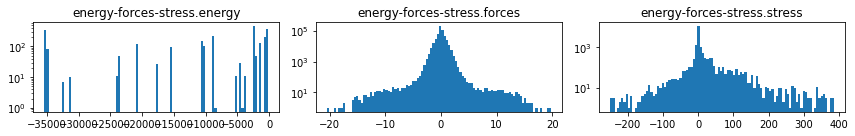

In [25]:
fig = client.plot_histograms(
    ['energy-forces-stress.energy', 'energy-forces-stress.forces', 'energy-forces-stress.stress'],
    yscale='log',
    ids=dataset.property_ids,
    verbose=True
)

In [26]:
client.dataset_to_markdown(
    ds_id=ds_id,
    base_folder='/home/jvita/scripts/colabfit/colabfit/examples/Si_PRX_GAP/si_prx_gap-example.ipynb'+dataset.name,
    html_file_name='README.md',
    data_format='mongo',
    data_file_name=None,
    histogram_fields=['energy-forces-stress.energy', 'energy-forces-stress.forces', 'energy-forces-stress.stress'],
    yscale='log'
)

## Filtering datasets based on XC functional

In [ ]:
set(client.get_data('properties', 'si-prx-gap-data.xc-functional', ravel=True))

In [ ]:
no_xc_config_sets, no_xc_pr_ids = client.filter_on_properties(
    ds_id,
    query={'si-prx-gap-data.xc-functional.source-value': {'$exists': False}},
)

new_cs_ids = []
for cs in no_xc_config_sets:
    new_cs_ids.append(client.insert_configuration_set(cs.configuration_ids, cs.description, verbose=True))

no_xc_ds_id = client.insert_dataset(
    cs_ids=new_cs_ids,
    pr_ids=no_xc_pr_ids,
    name='Si_PRX_GAP-no-xc',
    authors=dataset.authors,
    links=dataset.links,
    description="A subset of the Si_PRX_GAP dataset that only contains data without a specified XC functional",
    resync=True,
    verbose=True,
)

dataset = client.get_dataset(no_xc_ds_id, resync=True)['dataset']

client.dataset_to_markdown(
    ds_id=no_xc_ds_id,
    base_folder='/colabfit/markdown/'+dataset.name,
    html_file_name='README.md',
    data_format='mongo',
    data_file_name=None,
    histogram_fields=['energy-forces-stress.energy', 'energy-forces-stress.forces', 'energy-forces-stress.stress'],
    yscale='log'
)

no_xc_ds_id

In [ ]:
pbe_config_sets, pbe_pr_ids = client.filter_on_properties(
    ds_id,
    query={'si-prx-gap-data.xc-functional.source-value': 'PBE'},
)

new_cs_ids = []
for cs in pbe_config_sets:
    if cs.configuration_ids:
        new_cs_ids.append(client.insert_configuration_set(cs.configuration_ids, cs.description, verbose=True))
        
pbe_ds_id = client.insert_dataset(
    cs_ids=new_cs_ids,
    pr_ids=pbe_pr_ids,
    name='Si_PRX_GAP-pbe',
    authors=dataset.authors,
    links=dataset.links,
    description="A subset of the Si_PRX_GAP dataset that only contains data computed using the PBE XC functional",
    resync=True,
    verbose=True,
)

dataset = client.get_dataset(pbe_ds_id, resync=True)['dataset']

client.dataset_to_markdown(
    ds_id=pbe_ds_id,
    base_folder='/colabfit/markdown/'+dataset.name,
    html_file_name='README.md',
    data_format='mongo',
    data_file_name=None,
    histogram_fields=[],
    yscale='log'
)

pbe_ds_id

In [ ]:
pw91_config_sets, pw91_pr_ids = client.filter_on_properties(
    ds_id,
    query={'si-prx-gap-data.xc-functional.source-value': 'PW91'},
)

new_cs_ids = []
for cs in pw91_config_sets:
    if cs.configuration_ids:
        new_cs_ids.append(client.insert_configuration_set(cs.configuration_ids, cs.description, verbose=True))
        
pw91_ds_id = client.insert_dataset(
    cs_ids=new_cs_ids,
    pr_ids=pw91_pr_ids,
    name='Si_PRX_GAP-pw91',
    authors=dataset.authors,
    links=dataset.links,
    description="A subset of the Si_PRX_GAP dataset that only contains data computed using the PW91 XC functional",
    resync=True,
    verbose=True,
)

dataset = client.get_dataset(pw91_ds_id, resync=True)['dataset']

client.dataset_to_markdown(
    ds_id=pw91_ds_id,
    base_folder='/colabfit/markdown/'+dataset.name,
    html_file_name='README.md',
    data_format='mongo',
    data_file_name=None,
    histogram_fields=[],
    yscale='log'
)

pw91_ds_id